# Koc University ENGR421 Fall 2020 HW4

## Onur Mavitaş

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")
data_set = data_set[1:,:]
# get x and y values
x_train = data_set[:100,0]
y_train = data_set[:100:,1]
training_set = data_set[:100,:]
test_set = data_set[100:133,:]
x_test = data_set[100:133,0]
y_test = data_set[100:133,1]
N = x_train.shape[0]

# get train and test splits
train_indices = np.concatenate((np.arange(0, ), np.arange(50, 75), np.arange(100, 125)))
test_indices = np.setdiff1d(range(N), train_indices)

## Drawing Parameters

In [4]:
origin = 0
minimum_value = origin
maximum_value = 100
data_interval = np.linspace(minimum_value, maximum_value, 1601)

In [5]:
bin_width = 3
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)

## Regressogram

In [6]:
g_hat = np.asarray([np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b]))*y_train)/np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))])                                                                                                                              
                                                                                                                                             

/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


(34,)

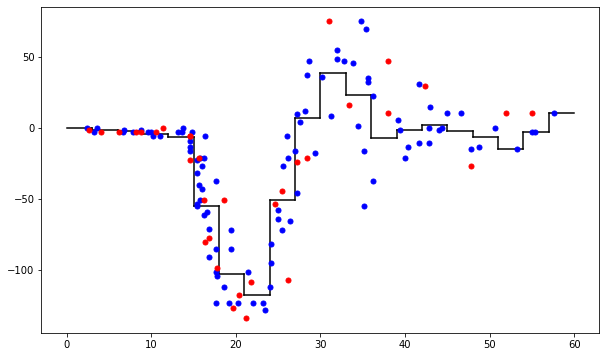

In [7]:
plt.figure(figsize = (10, 6))

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [g_hat[b], g_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [g_hat[b], g_hat[b + 1]], "k-")
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.show()

In [8]:
test_digitize = np.digitize(x_test, right_borders, right=True)
errors = []
for i in range(len(y_test)):
    errors.append((y_test[i] - g_hat[test_digitize[i]])**2)
    
errors = np.asarray(errors)
rmse = np.sqrt(np.sum(errors)/len(y_test))
print(f"Regressogram => RMSE is {round(rmse, 4)} when h is {bin_width}")

Regressogram => RMSE is 24.726 when h is 3


## Running Mean Smoother

In [9]:
g_hat = np.asarray([np.sum((np.abs((x-x_train)/bin_width)<=1)*y_train)/np.sum(np.abs((x-x_train)/bin_width)<=1) for x in data_interval])
                    

/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


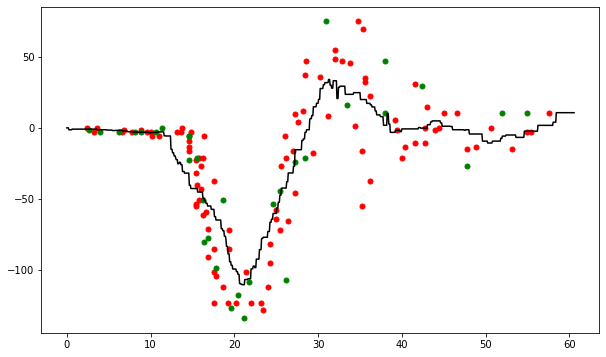

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "r.", markersize = 10)
plt.plot(x_test,y_test, "g.", markersize = 10)

plt.plot(data_interval, g_hat, "k-")
plt.show()

In [12]:
test_digitize = np.digitize(x_test, data_interval, right=True)
errors = []
for i in range(len(y_test)):
    errors.append((y_test[i] - g_hat[test_digitize[i]])**2)
    
errors = np.asarray(errors)
rmse = np.sqrt(np.sum(errors)/len(y_test))
print(f"Running Mean Smoother => RMSE is {round(rmse, 4)} when h is {bin_width}")

Running Mean Smoother => RMSE is 24.2657 when h is 3


## Kernel Smoother

In [42]:
data_interval = np.linspace(minimum_value, maximum_value, 60)
bin_width = 1
g_hat = np.asarray([np.sum((1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2))*y_train) / np.sum(1/np.sqrt(2* math.pi) * np.exp(-0.5 * (x-x_train)**2 / bin_width**2)) for x in data_interval])


/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


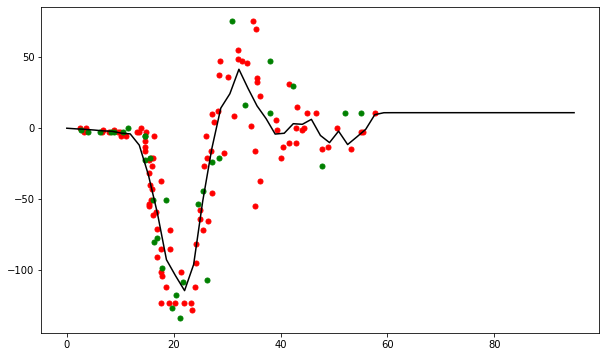

In [44]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "r.", markersize = 10)
plt.plot(x_test,y_test, "g.", markersize = 10)

plt.plot(data_interval,g_hat, "k-")
plt.show()

In [46]:
test_digitize = np.digitize(x_test, data_interval, right=True)
errors = []
for i in range(len(y_test)):
    errors.append((y_test[i] - g_hat[test_digitize[i]])**2)
    
errors = np.asarray(errors)
rmse = np.sqrt(np.sum(errors)/len(y_test))
print(f"Kernel Smoother => RMSE is {round(rmse, 4)} when h is {bin_width}")

Kernel Smoother => RMSE is 26.8341 when h is 1
